In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/emil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/emil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
df_fake = pd.read_csv("https://raw.githubusercontent.com/emilurosev/isot-fake-news-dataset/main/Fake.csv")
df_true = pd.read_csv("https://raw.githubusercontent.com/emilurosev/isot-fake-news-dataset/main/True.csv")
df_fake["label"] = 0
df_true["label"] = 1
df = pd.concat([df_fake, df_true], axis =0)

In [4]:
df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [5]:
df.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [7]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [8]:
df['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

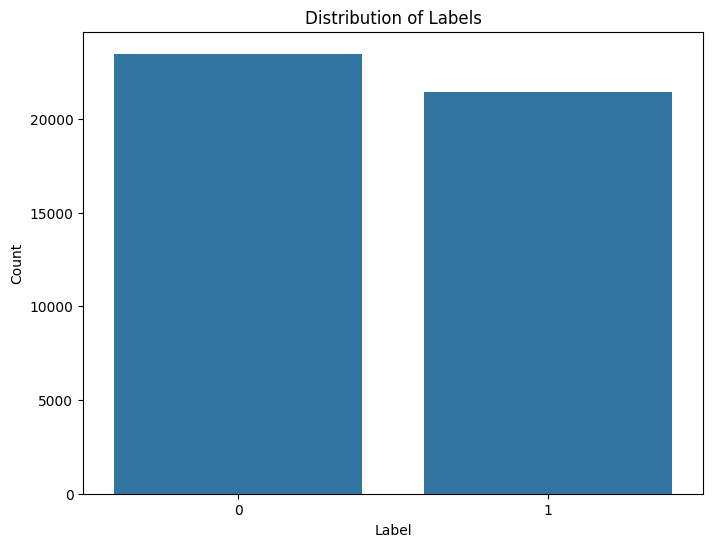

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
df['subject'].value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

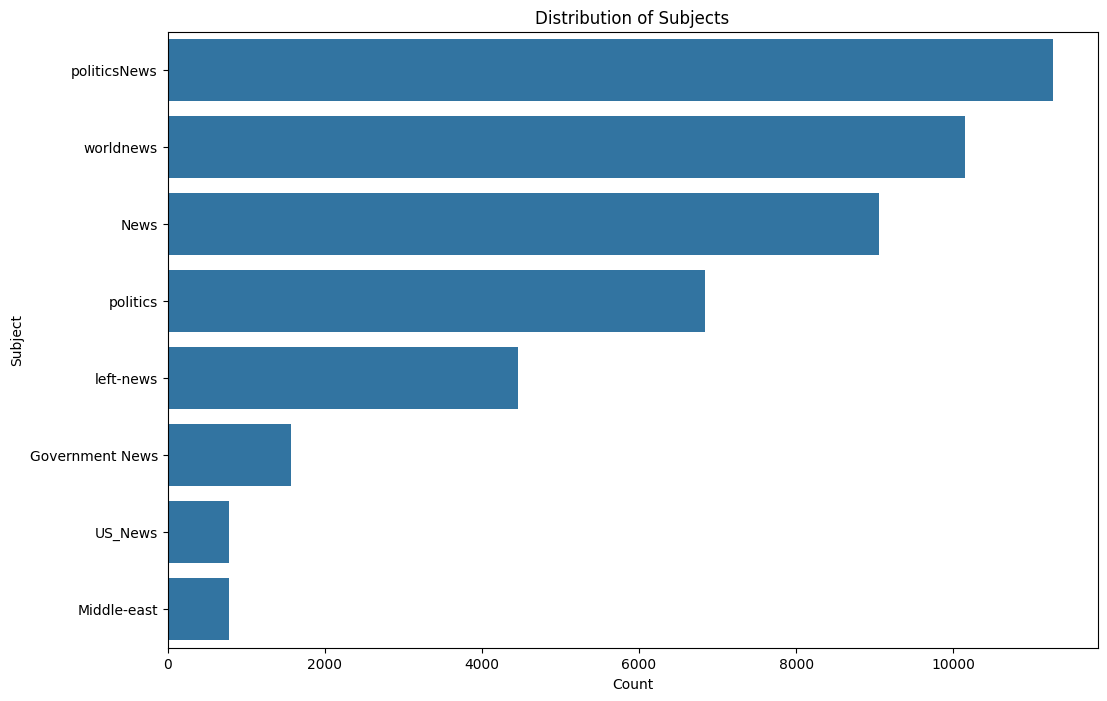

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index)
plt.title('Distribution of Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.show()

In [12]:
df['text_length'] = df['text'].apply(len)

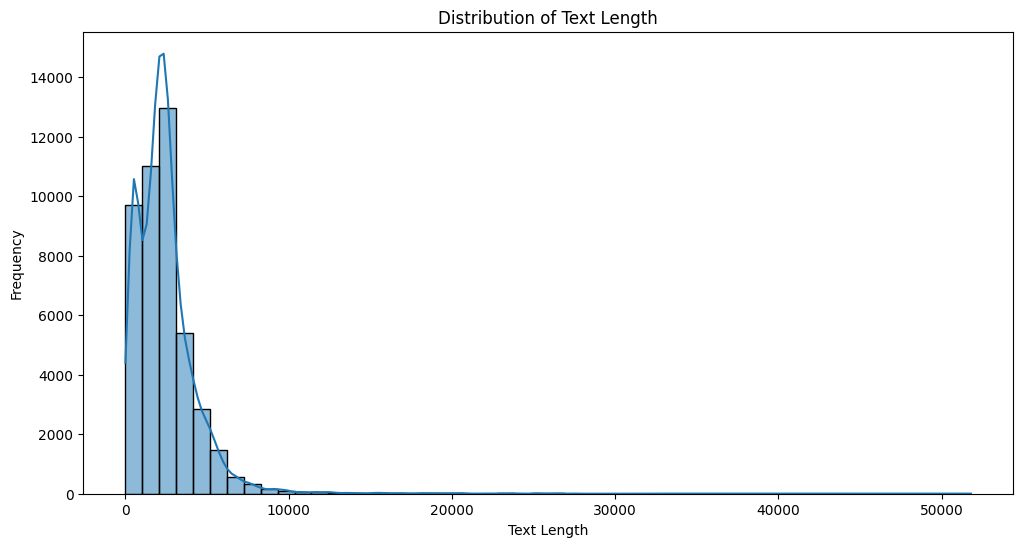

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [14]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return ' '.join(words)

In [15]:
df['processed_text'] = df['text'].apply(clean_text)

In [16]:
# Function to get most common n-grams
def get_ngrams(text, n=1):
    words = word_tokenize(text)
    return list(ngrams(words, n))

# Generate most common n-grams
def generate_common_ngrams(df, n=1):
    all_ngrams = [ngram for text in df['processed_text'] for ngram in get_ngrams(text, n)]
    common_ngrams = Counter(all_ngrams).most_common(20)
    return common_ngrams

# Function to visualize n-grams
def plot_ngrams(common_ngrams, title):
    plt.figure(figsize=(10, 5))
    plt.bar([' '.join(ngram) for ngram, count in common_ngrams], [count for ngram, count in common_ngrams])
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Function to generate word cloud
def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [17]:
common_words_all = generate_common_ngrams(df, 1)
common_bigrams_all = generate_common_ngrams(df, 2)
common_trigrams_all = generate_common_ngrams(df, 3)

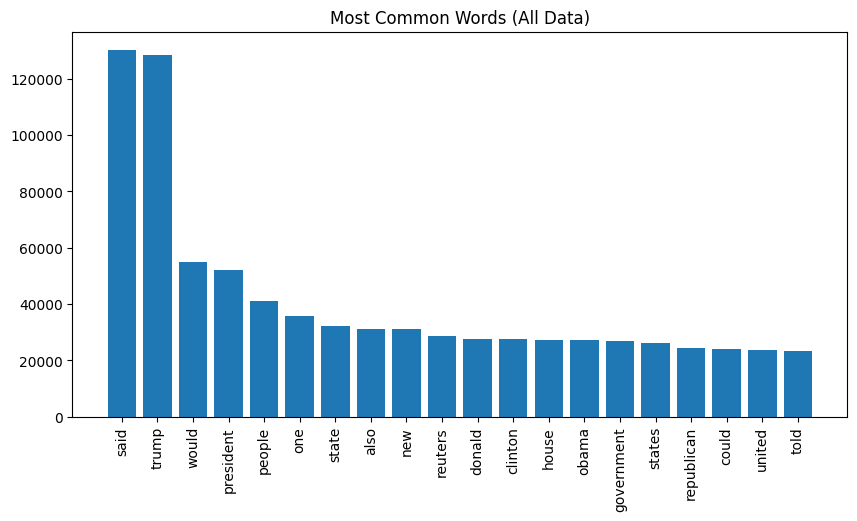

In [18]:
plot_ngrams(common_words_all, 'Most Common Words (All Data)')

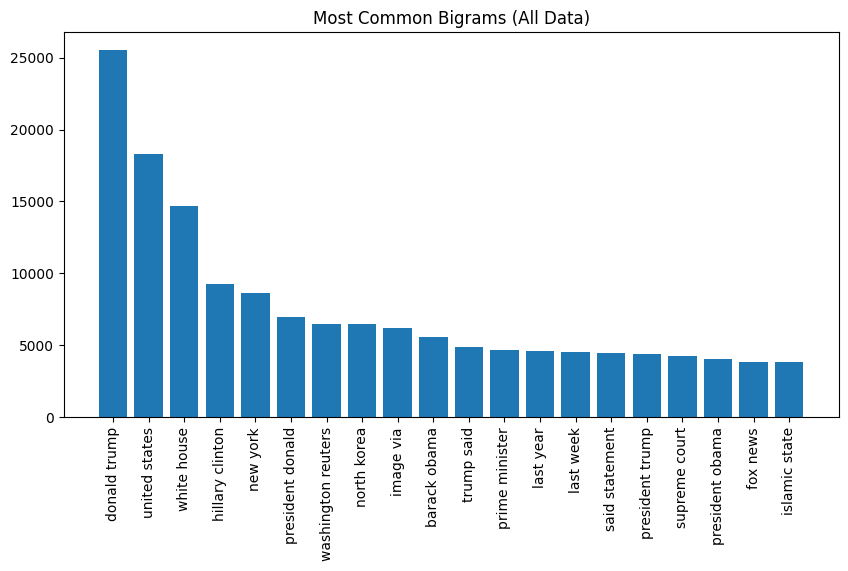

In [19]:
plot_ngrams(common_bigrams_all, 'Most Common Bigrams (All Data)')

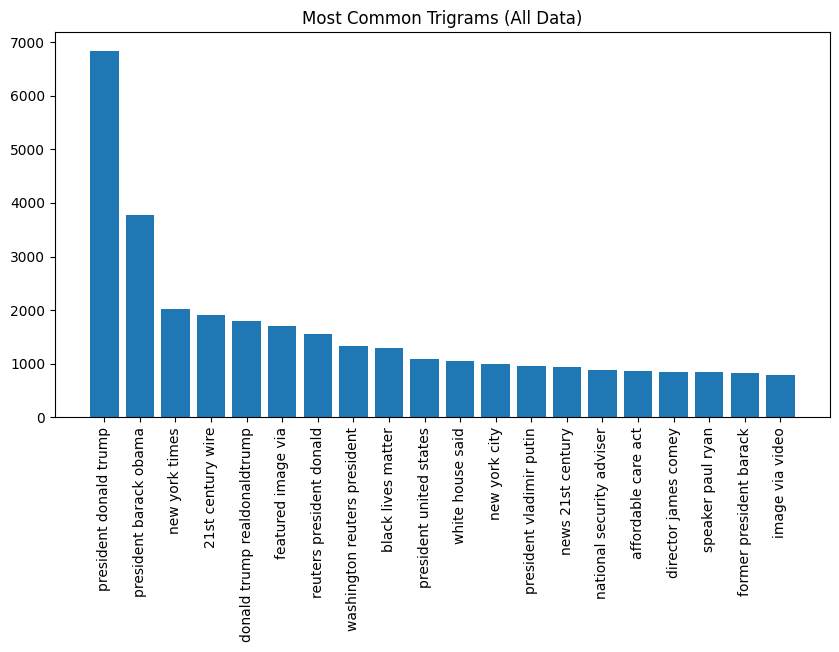

In [20]:
plot_ngrams(common_trigrams_all, 'Most Common Trigrams (All Data)')

In [21]:
df_fake = df[df['label'] == 0]
common_words_fake = generate_common_ngrams(df_fake, 1)
common_bigrams_fake = generate_common_ngrams(df_fake, 2)
common_trigrams_fake = generate_common_ngrams(df_fake, 3)

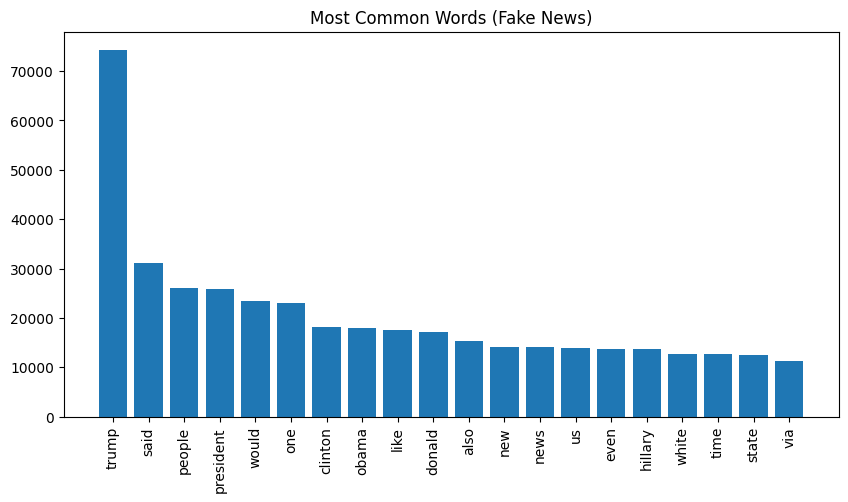

In [22]:
plot_ngrams(common_words_fake, 'Most Common Words (Fake News)')

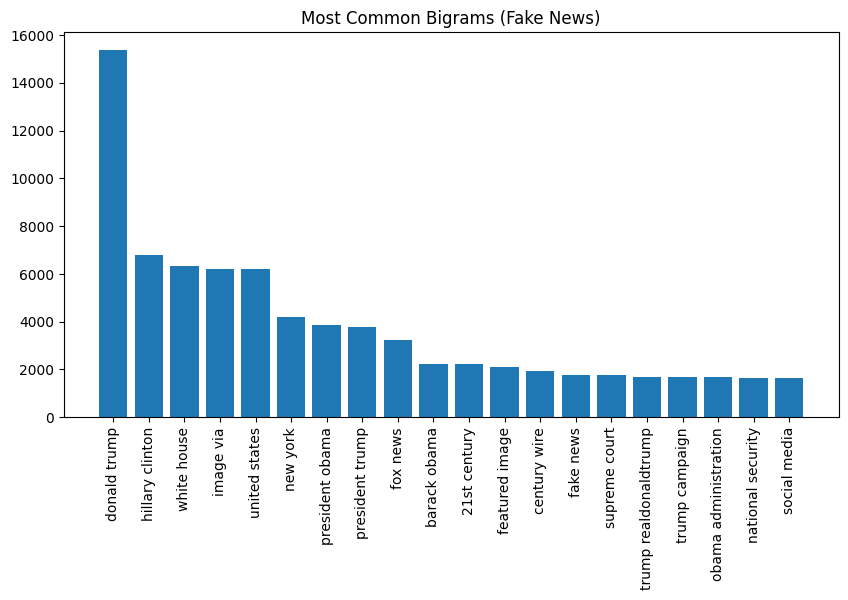

In [23]:
plot_ngrams(common_bigrams_fake, 'Most Common Bigrams (Fake News)')

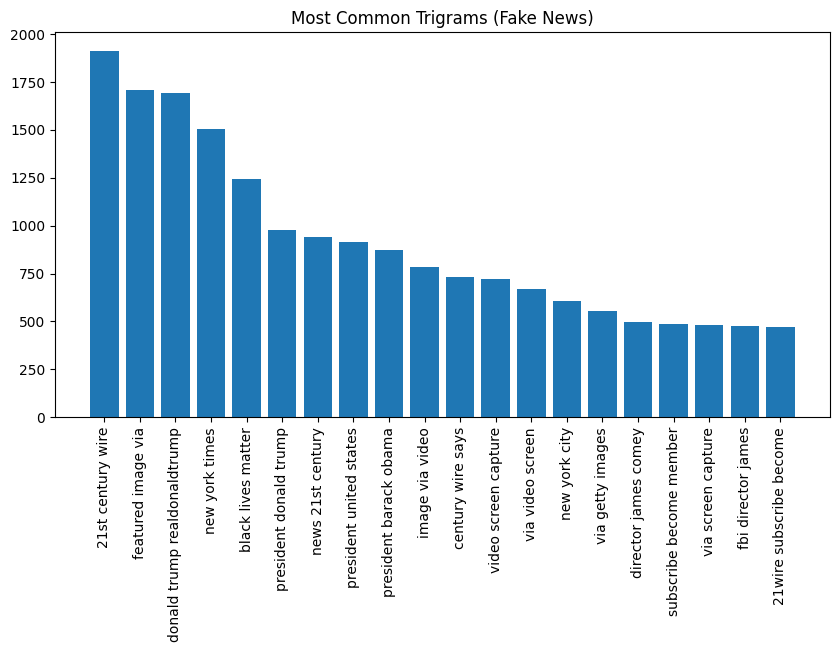

In [24]:
plot_ngrams(common_trigrams_fake, 'Most Common Trigrams (Fake News)')

In [25]:
df_real = df[df['label'] == 1]
common_words_real = generate_common_ngrams(df_real, 1)
common_bigrams_real = generate_common_ngrams(df_real, 2)
common_trigrams_real = generate_common_ngrams(df_real, 3)

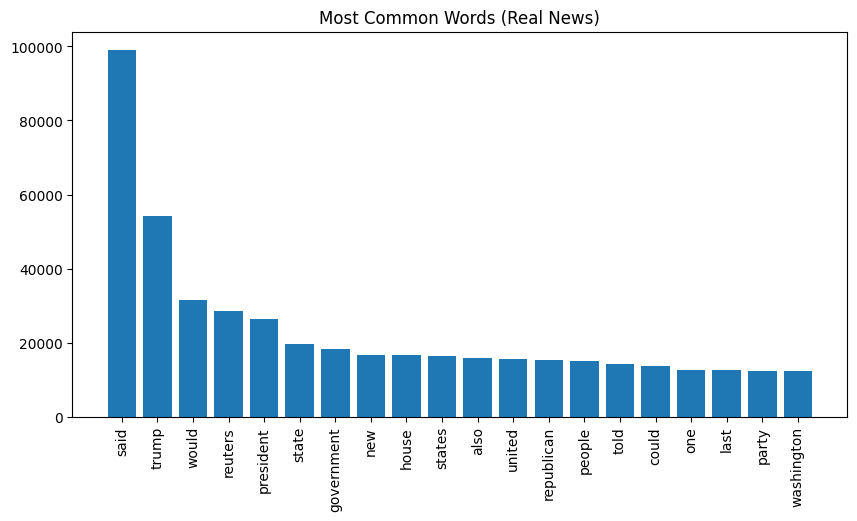

In [26]:
plot_ngrams(common_words_real, 'Most Common Words (Real News)')

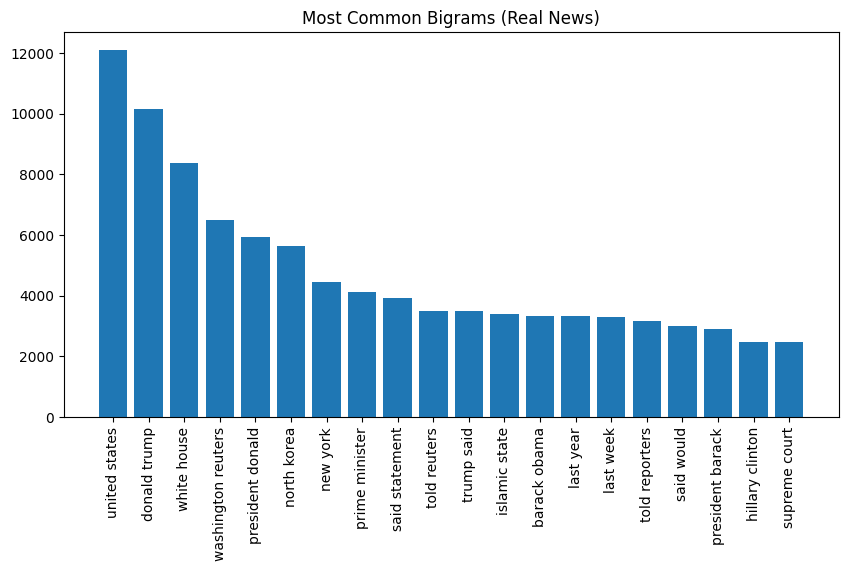

In [27]:
plot_ngrams(common_bigrams_real, 'Most Common Bigrams (Real News)')

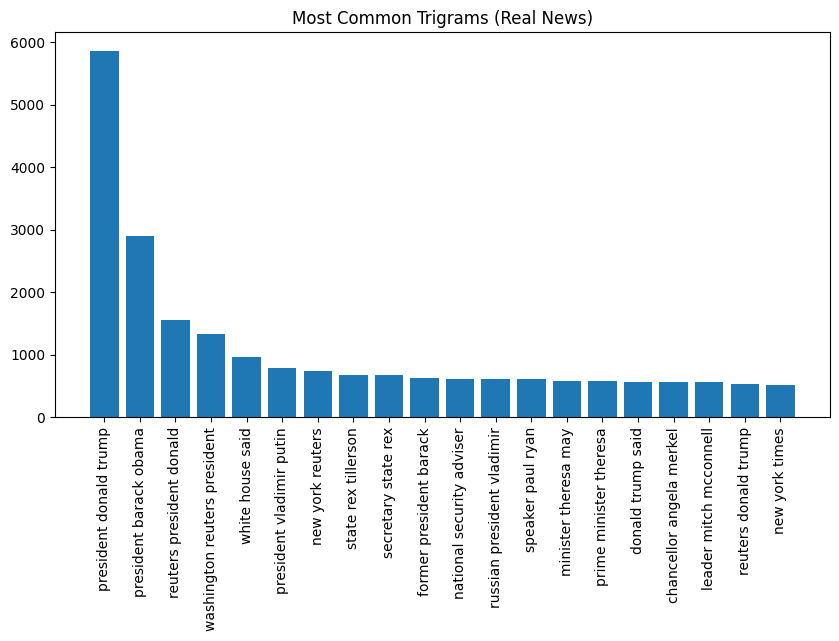

In [28]:
plot_ngrams(common_trigrams_real, 'Most Common Trigrams (Real News)')

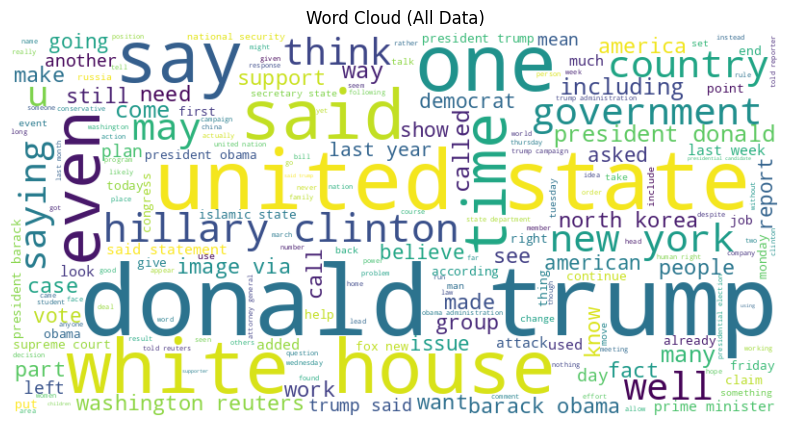

In [29]:
generate_wordcloud(' '.join(df['processed_text']), 'Word Cloud (All Data)')

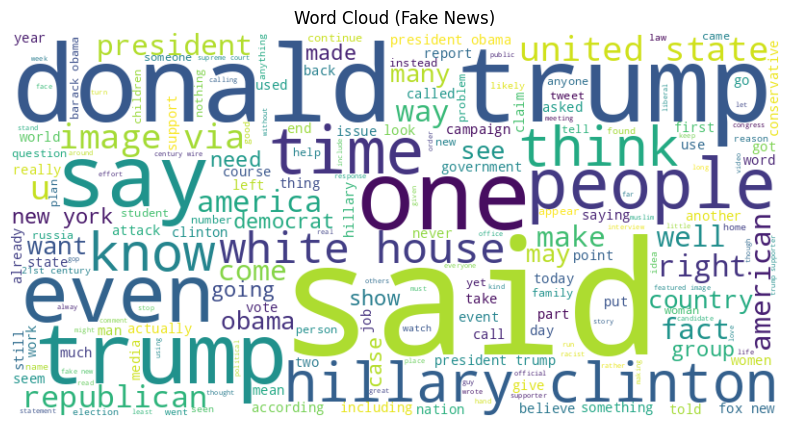

In [30]:
generate_wordcloud(' '.join(df_fake['processed_text']), 'Word Cloud (Fake News)')

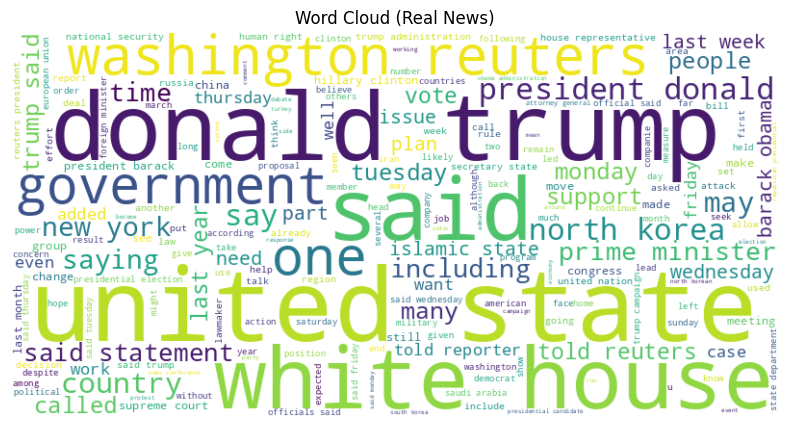

In [31]:
generate_wordcloud(' '.join(df_real['processed_text']), 'Word Cloud (Real News)')